In [53]:
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import matplotlib.ticker as ticker 
from sklearn.cluster import KMeans
from datetime import datetime
from pytz import timezone

In [54]:
data = pd.read_csv("/app/knight/Test_knight.csv")


     Sensitivity  Hability  Strength   Power  Agility  Dexterity  Awareness  \
0         11.420     20.38     77.58   386.1  0.14250    0.28390    0.24140   
1         18.250     19.98    119.60  1040.0  0.09463    0.10900    0.11270   
2         14.680     20.13     94.74   684.5  0.09867    0.07200    0.07395   
3         13.540     14.36     87.46   566.3  0.09779    0.08129    0.06664   
4         15.340     14.26    102.50   704.4  0.10730    0.21350    0.20770   
..           ...       ...       ...     ...      ...        ...        ...   
166        9.423     27.88     59.26   271.3  0.08123    0.04971    0.00000   
167       14.590     22.68     96.39   657.1  0.08473    0.13300    0.10290   
168       20.920     25.09    143.00  1347.0  0.10990    0.22360    0.31740   
169       16.600     28.08    108.30   858.1  0.08455    0.10230    0.09251   
170        7.760     24.54     47.92   181.0  0.05263    0.04362    0.00000   

     Prescience  Reactivity  Midi-chlorien  ...  Re

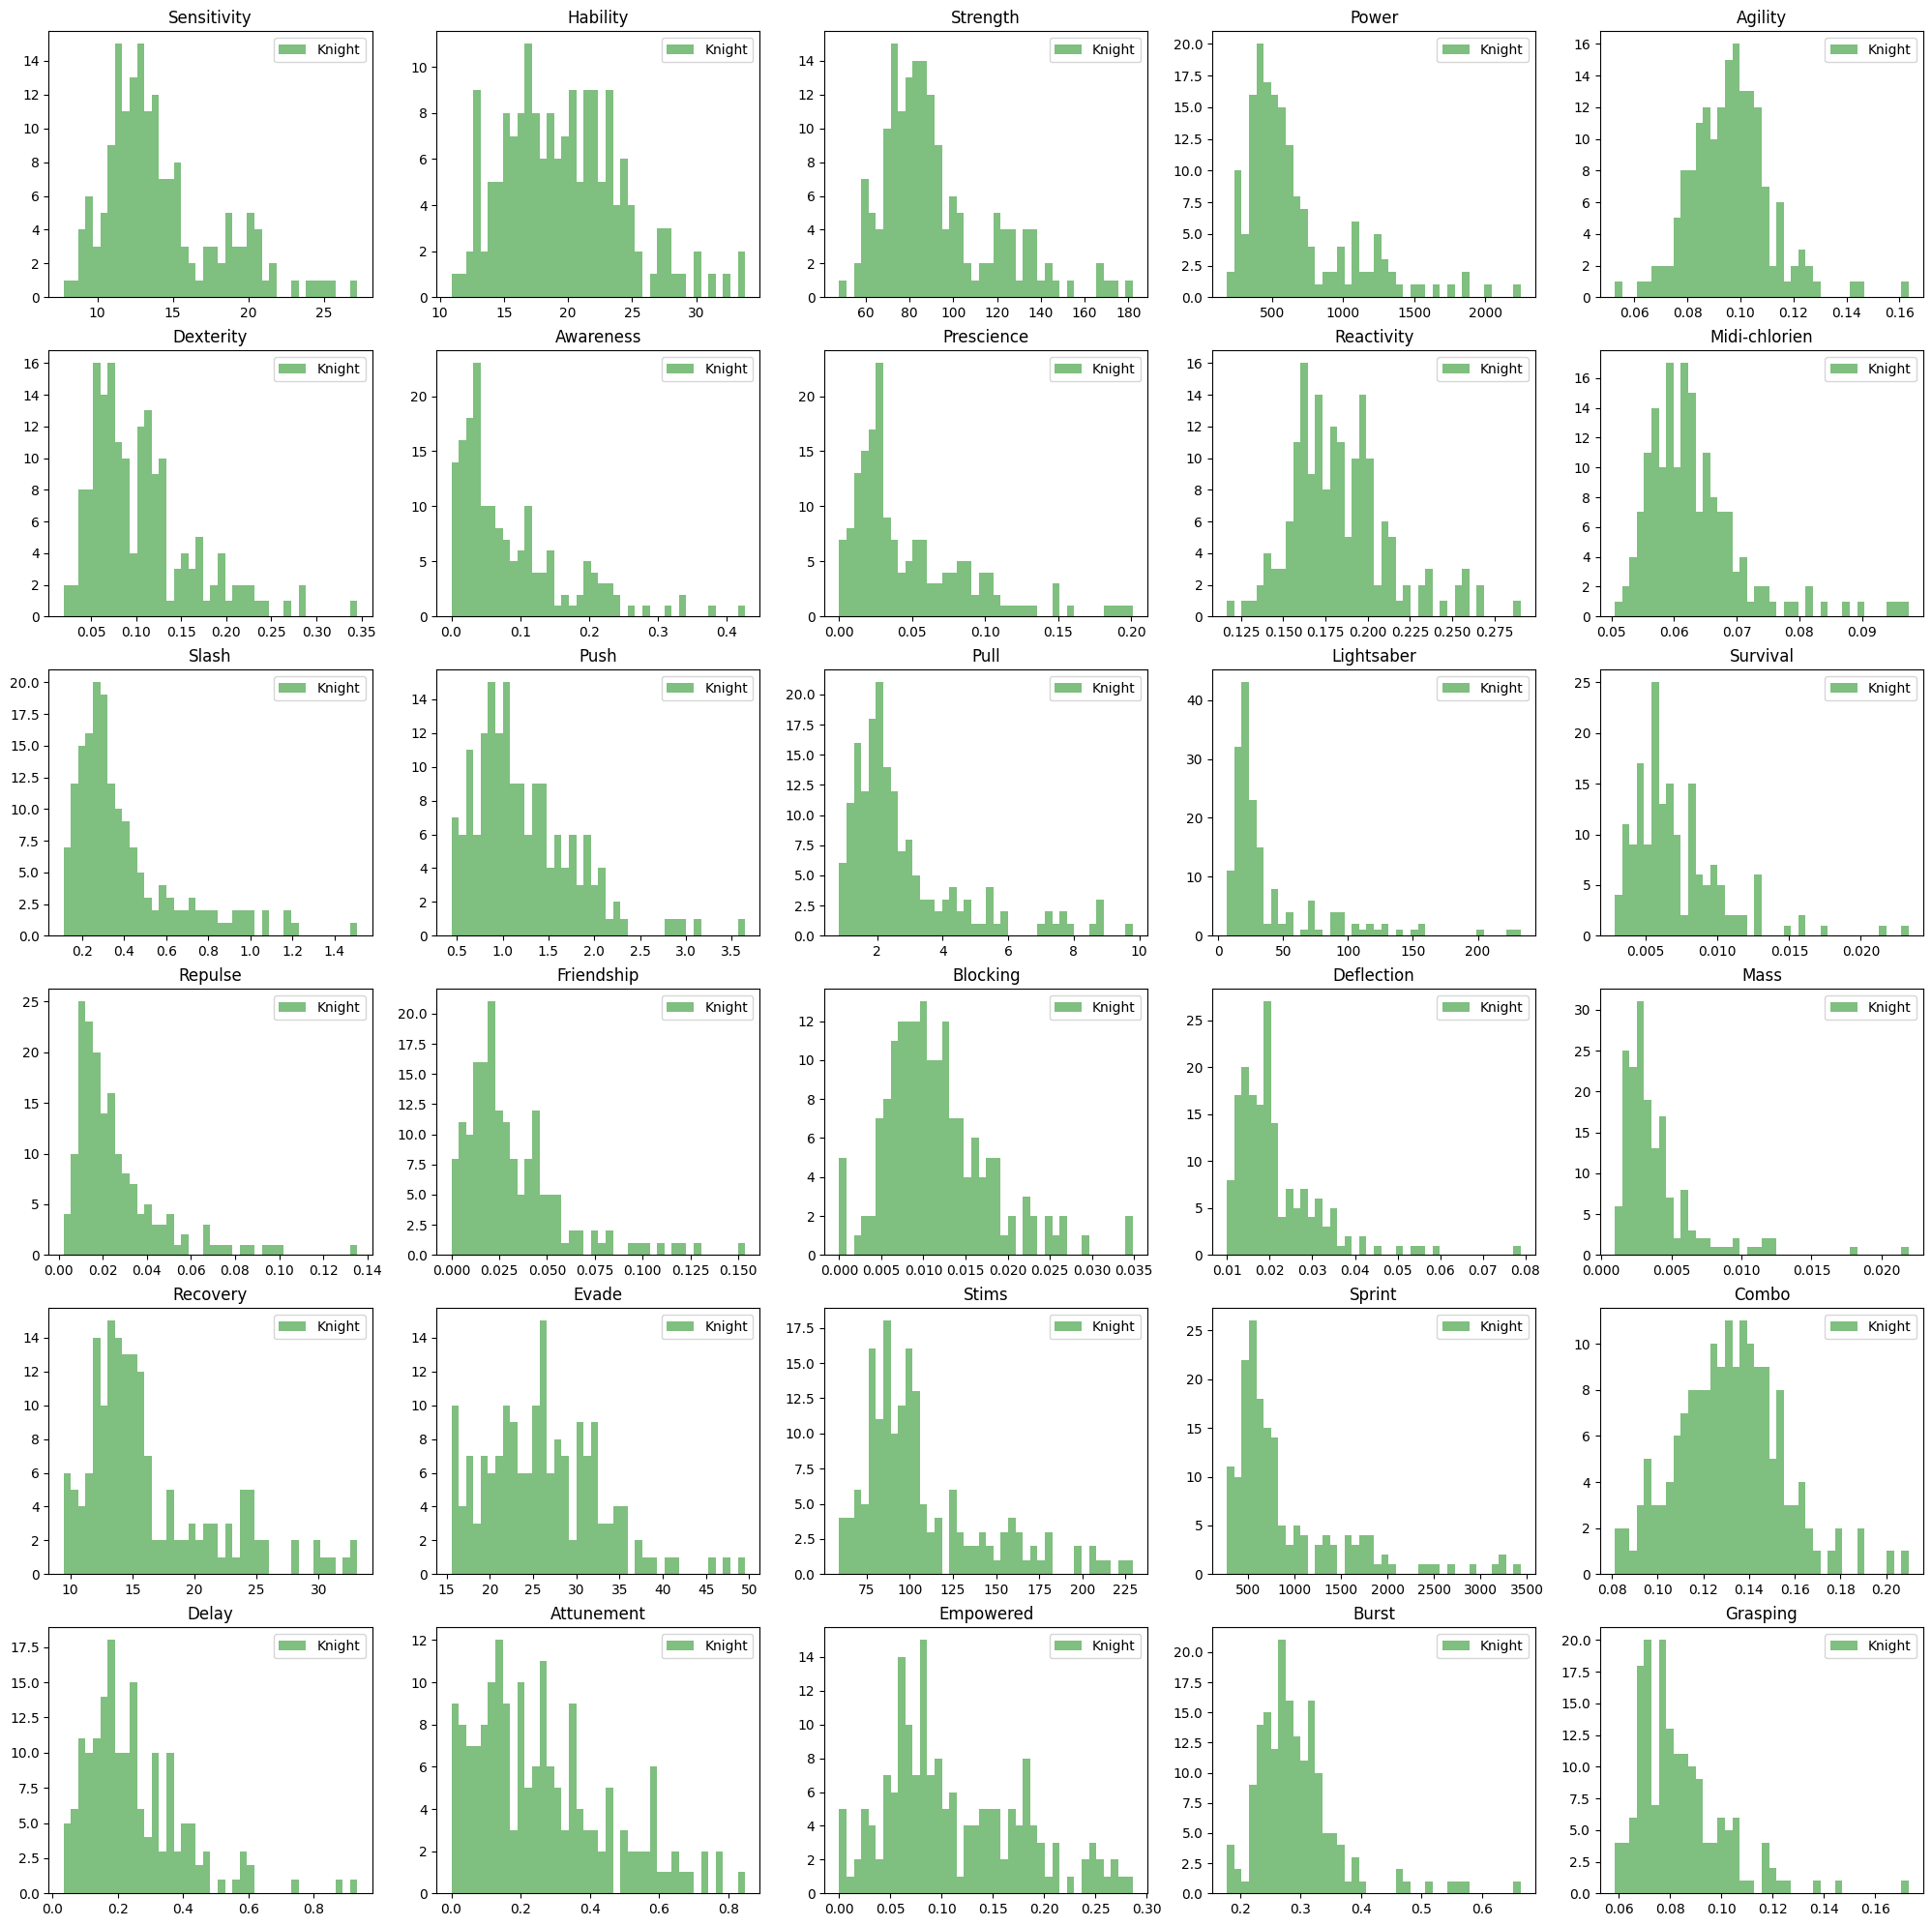

In [127]:
n_bins = 40
colums = len(data.columns)
row = colums // 5

fig = plt.figure(figsize=(25,25))

for i in range(row):
    for j in range(5):
        plot = plt.subplot2grid((6, 5), (i, j), fig=fig)
        name = data.columns[i * 5 + j]
        plot.hist(data[name], bins=n_bins, color='#7fbf7f', label='Knight')
        plot.set_title(name)
        plot.legend(loc="upper right")

plt.show()

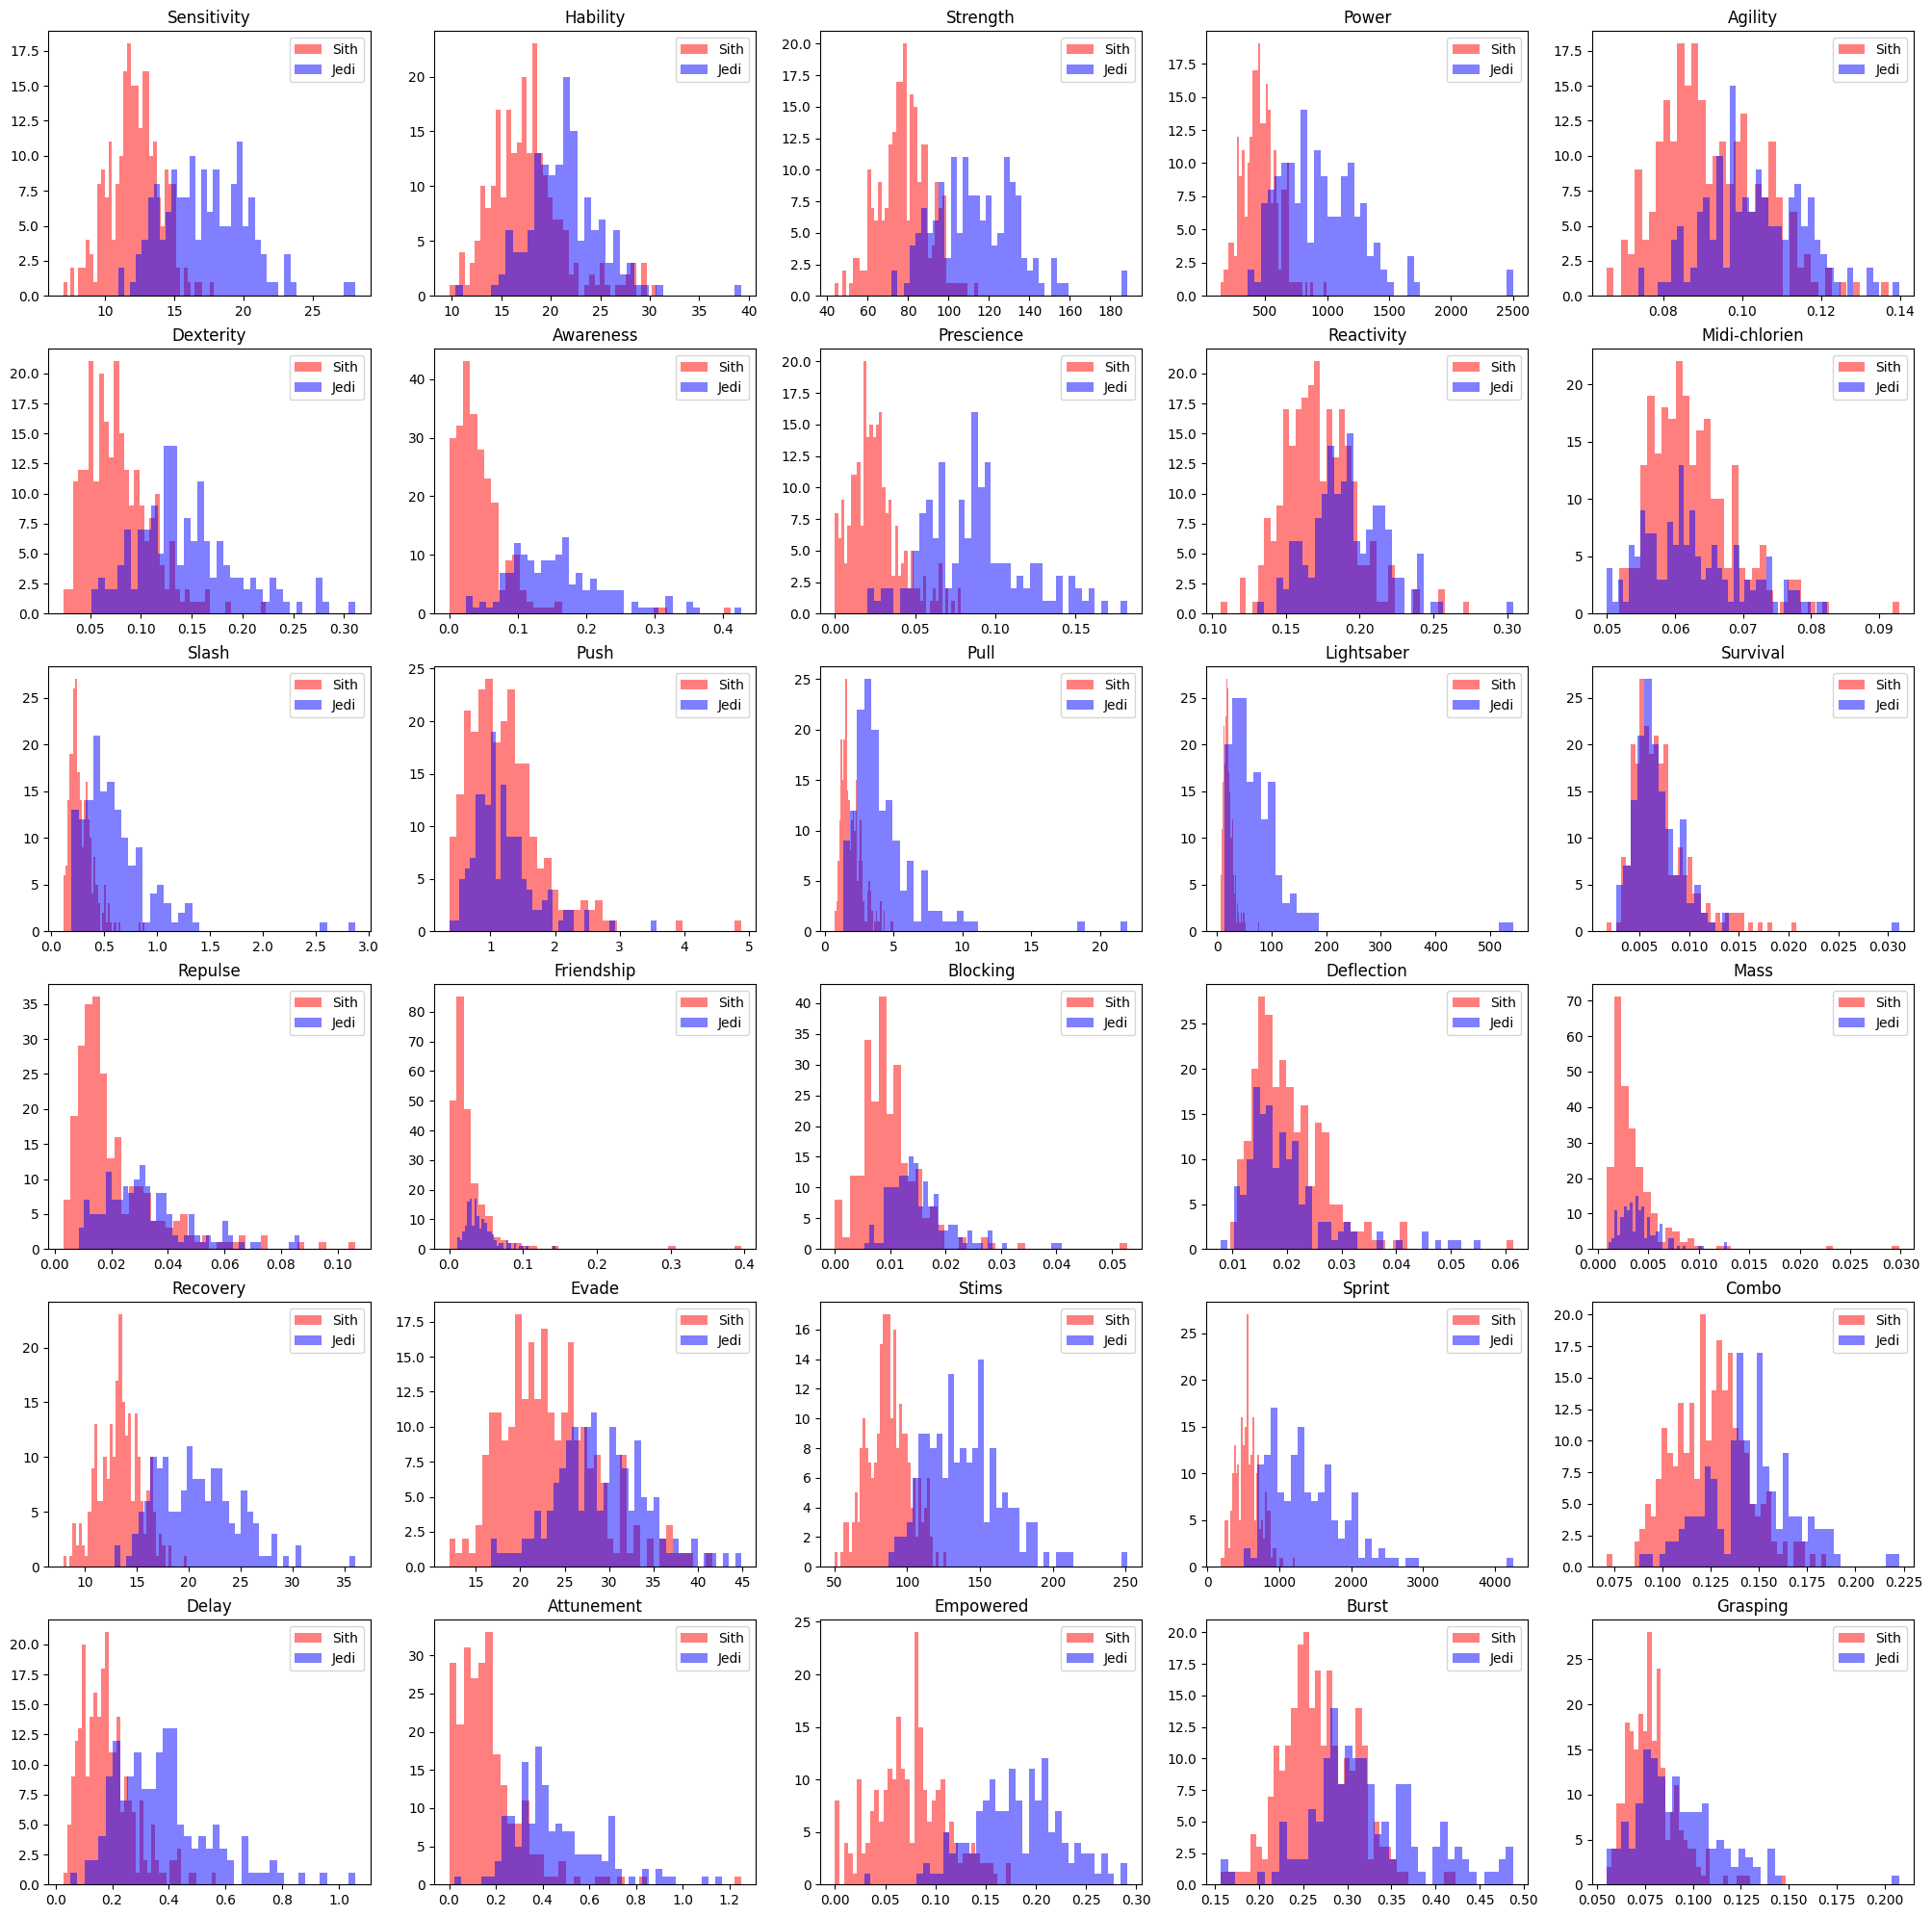

In [130]:
dataTrain = pd.read_csv("/app/knight/Train_knight.csv")

fig = plt.figure(figsize=(25,25))

knight = dataTrain.groupby('knight').apply(lambda x : x)

for i in range(row):
    for j in range(5):
        plot = plt.subplot2grid((6, 5), (i, j), fig=fig)
        name = data.columns[i * 5 + j]
        plot.hist(knight[name]['Sith'], bins=n_bins, color='red', alpha=0.5, label='Sith')
        plot.hist(knight[name]['Jedi'], bins=n_bins, color='blue', alpha=0.5, label='Jedi')
        plot.set_title(name)
        plot.legend(loc="upper right")

plt.show()

In [148]:
cor = knight.replace({'knight': 'Jedi'}, 1)
cor = cor.replace({'knight': 'Sith'}, 0)

cor = cor.corr()

cor = cor.sort_values(by='knight',ascending=False)

print(cor['knight'])

knight           1.000000
Empowered        0.793652
Prescience       0.790066
Stims            0.786797
Recovery         0.777633
Sprint           0.739672
Strength         0.737403
Sensitivity      0.721566
Power            0.700709
Awareness        0.699662
Attunement       0.648893
Dexterity        0.631987
Delay            0.598072
Slash            0.550663
Pull             0.537800
Lightsaber       0.515340
Evade            0.465605
Hability         0.446632
Burst            0.445847
Combo            0.445223
Blocking         0.421950
Agility          0.397458
Reactivity       0.375103
Grasping         0.350105
Repulse          0.324399
Friendship       0.236633
Mass             0.113185
Midi-chlorien    0.008132
Push            -0.019446
Deflection      -0.026489
Survival        -0.043099
Name: knight, dtype: float64
